# Analysis of Automobile Sales During Recession Periods

This project aims to analyze the historical automobile sales data, focusing on the impact of recession periods on sales. The data used in this analysis is sourced from the IBM Developer Skills Network and includes variables such as year, automobile sales, vehicle type, recession status, GDP, consumer confidence, price, advertising expenditure, and unemployment rate.

In [ ]:
#install required packages
%pip install seaborn
%pip install folium
%pip install js


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Import and Overview

In [50]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)

# Check if the request was successful
if resp.status_code == 200:
    # Create a BytesIO object from the response content
    text = resp.content

    # Read the CSV data into a Pandas dataframe
    df = pd.read_csv(io.BytesIO(text))

    # Print a success message
    print('Data downloaded and read into a dataframe!')
else:
    # Print an error message if the request was not successful
    print('Error downloading the file.')

# Now you can work with the dataframe as needed

Data downloaded and read into a dataframe!


The data is downloaded from a URL and read into a pandas dataframe. The ***describe()*** function is used to generate descriptive statistics of the dataframe, and the ***columns*** function is used to list the column names in the dataframe.



In [51]:
df.describe()


,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [52]:
df.columns


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Data Visualization




Line Plot of Automobile Sales Over Time




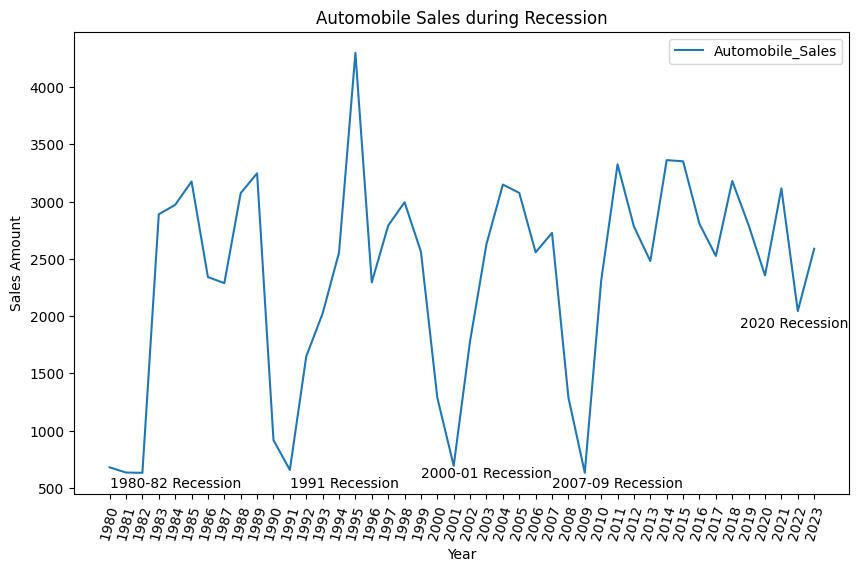

In [53]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Automobile Sales during Recession')
plt.text(1980, 500, '1980-82 Recession')
plt.text(1991, 500, '1991 Recession')
plt.text(1999, 590, '2000-01 Recession')
plt.text(2007, 500, '2007-09 Recession')
plt.text(2018.5, 1900, '2020 Recession')
plt.legend()
plt.show()


Line Plot of Different Cars Sales Over Time During Recession

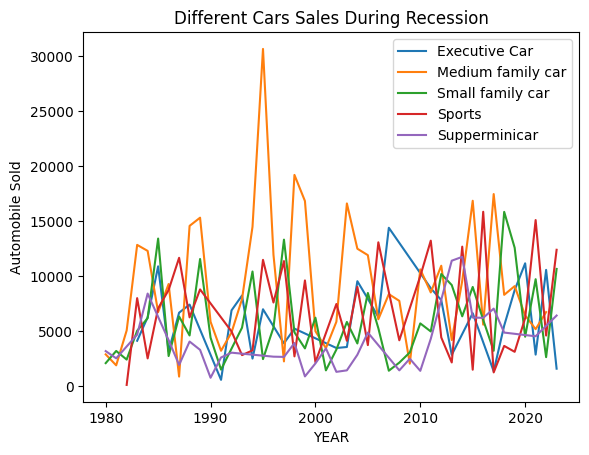

In [60]:
df_Mline = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
df['Vehicle_Type'] = df['Vehicle_Type'].replace({
    'Executivecar': 'Executive Car',
    'Superminicar': 'Super mini car',
    'Mediumfamilycar': 'Medium family car',
    'Smallfamiliycar': 'Small family car'
})
plt.xlabel('YEAR')
plt.ylabel('Automobile Sold')
plt.title('Different Cars Sales During Recession')
plt.legend()
plt.show()


From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.

Bar Plot of Average Automobile Sales During Recession vs Non-Recession Period



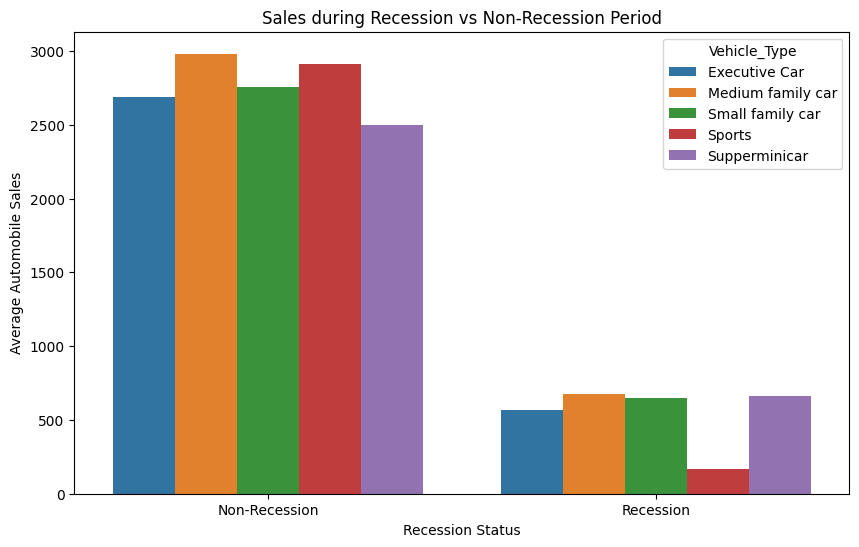

In [55]:

recession_data = df[df['Recession'] == 1]

# Group data by recession status and vehicle type, and calculate the mean of automobile sales
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Status')
plt.ylabel('Average Automobile Sales')
plt.title('Sales during Recession vs Non-Recession Period')
plt.show()


Line Plot of GDP Variation during Recession and Non-Recession Period



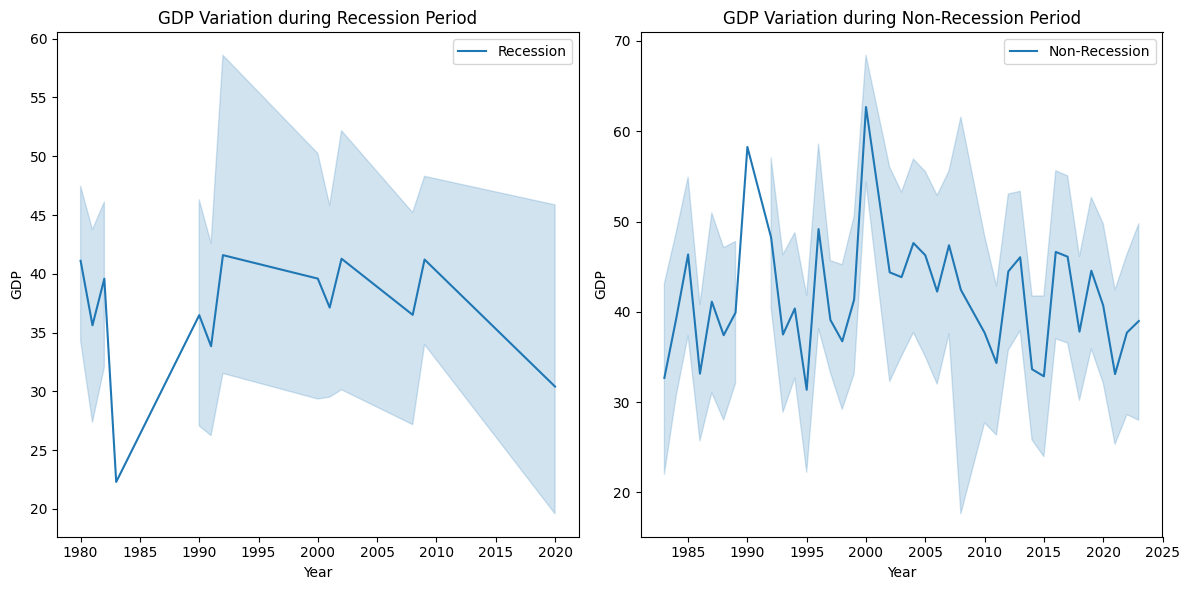

In [56]:
# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# Subplot 2
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()


It is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

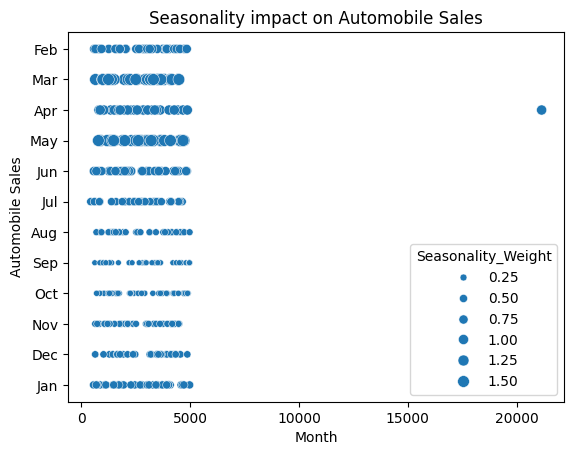

In [61]:
no_rec_data = df[df['Recession'] == 0]
size = non_rec_data['Seasonality_Weight']
sns.scatterplot(data=no_rec_data, x='Automobile_Sales', y='Month', size=size)
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.show()




Scatter Plot for Consumer Confidence and Automobile Sales during Recessions



In [ ]:
recession_data = df[df['Recession'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'])
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.show()


Pie Chart for Advertisement Expenditure by Vehicle Type during Recession Period



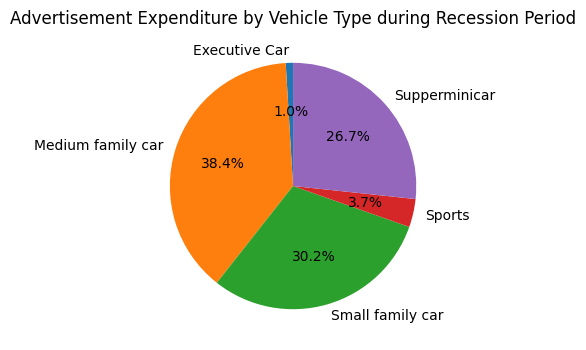

In [58]:
advertisement_expenditure_by_type = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(6, 4))
labels = advertisement_expenditure_by_type.index
sizes = advertisement_expenditure_by_type.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertisement Expenditure by Vehicle Type during Recession Period')
plt.show()


During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


Line Plot of Unemployment Rate vs. Automobile Sales during Recession



/var/folders/nn/rlzjpy515vd_4k4tp_r07lv00000gn/T/ipykernel_16905/2498028085.py:4: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)


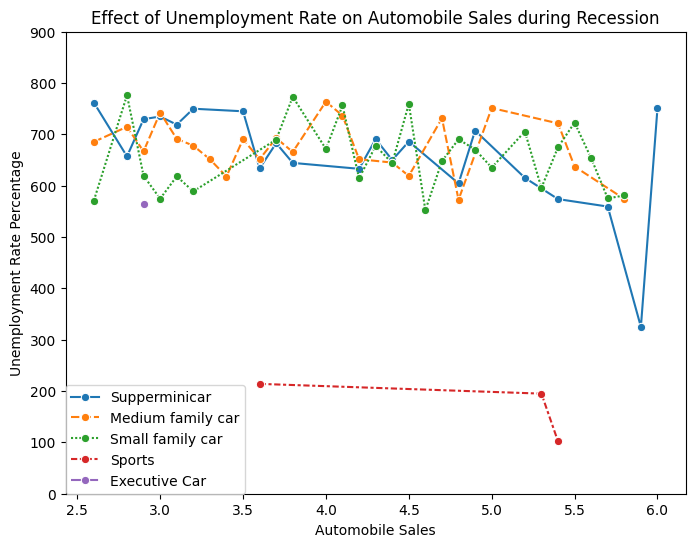

In [57]:
df_rec = df[df['Recession'] == 1]

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0, 900)
plt.xlabel('Automobile Sales')
plt.ylabel('Unemployment Rate Percentage')
plt.title('Effect of Unemployment Rate on Automobile Sales during Recession')
plt.legend(loc=(0, 0))
plt.show()


Map Visualization



In [ ]:
import requests

async def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print("File downloaded successfully.")
    else:
        print("Error downloading the file.")

# Example usage
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0, -99.700], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data='us-states.json',
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.65,
    line_opacity=0.4,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1



##### Based on the analysis of the historical automobile sales data during recession periods, several key insights have been gained:


1. The line plot of average automobile sales during recession periods demonstrates a significant decline in sales performance during major economic downturns compared to non-recession periods. The annotations of recession years on the graph provide a clear visual representation of the negative impact of recessions on automobile sales.

2. Comparing the graphs, there is a notable difference in the trend lines for recession vs. non-recession periods, with sales declining sharply during times of economic crisis. This indicates that recessions have a substantial influence on dampening consumer demand for vehicles.

3. Previous recessions may have impacted automobile sales to some degree. However, the scale and scope of the potential upcoming recession is different due to factors like high inflation, rising interest rates cooling the housing market, tightening monetary policies, geopolitical uncertainties, and the lingering effects of the pandemic on supply chains and consumer behavior.

4. The confluence of these conditions could result in a more prolonged and deeper economic downturn compared to past recessions. This makes the automotive industry more vulnerable and highlights the need for prudent strategic planning to mitigate risks.

In conclusion, visualizing the sales trends clearly shows that recessions have a significant negative effect on automobile demand. The upcoming recession may differ in severity from history based on current macroeconomic conditions, requiring adaptive measures from automakers.